In [14]:
import scipy.stats as stats
import numpy as np

x = np.linspace(0, 5, 10, endpoint=False)
y = stats.multivariate_normal.pdf(x, mean=2.5, cov=0.5)

In [15]:
y

array([0.00108914, 0.01033349, 0.05946514, 0.20755375, 0.43939129,
       0.56418958, 0.43939129, 0.20755375, 0.05946514, 0.01033349])

In [16]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

## Matlab output(as ref)
y =

    0.0011
    0.0103
    0.0595
    0.2076
    0.4394
    0.5642
    0.4394
    0.2076
    0.0595
    0.0103


# Test for z-shape mumeric

In [88]:
%matplotlib qt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm

def generate_potential_2d_Zshape_numeric(IN_n_states,flag_visualize):
    """
    The Zshape surface is a weighted sum of 2d Normal distributions and
    exponential functions
    
    INPUT : 
    [IN_n_states] : array with integers giving the number of states is each dimension
    (IN_n_states = [100,50] then x = linspace(x_min,x_max,n_states(1)) and y = linspace(x_min,x_max,n_states(2))
    [IN_n_states] : array with integers giving the number of states is each
    """
    # Q1: Will we change the limit later? A: Not required, could be optional paras.
    x_min = -2
    x_max = 2
    y_min = -1
    y_max = 3
    # Q2: The length of each range should be the same for now.

    x = np.linspace(x_min,x_max,IN_n_states[0]);
    y = np.linspace(y_min,y_max,IN_n_states[1]);

    #---Hyper-parameters---#
    border_coeff = 1; # Coefficient of borders 
    well_coeff = 10; # Coefficient of wells (larger value makes wells deeper and barrier between them bigger)


    #---PARAMETERS OF NORMAL DISTRIBUTIONS---#
    # Section "Bivariate case" in [https://en.wikipedia.org/wiki/Multivariate_normal_distribution]
    mu_1 = [-1.5,-0.5]
    mu_2 = [1.5,2.5]
    sigm_center_well = 0.4 # Sigma of some of the wells, sigm for sigma
    covar_mat_well = np.diag(np.dot(np.ones((len(IN_n_states))),sigm_center_well))
    ###Debugging
    print(covar_mat_well)

    mu_3 = [-0.5, 0]
    sig = [0.7, 0.28] # Origion: [1, 0.4] * 0.7 = result, flat one
    ro = 0.7
    colvar_mat_3 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    mu_4 = [0, 1]
    sig = [0.7, 0.7] # Origion: [1, 1] * 0.7, Diagonal one
    ro = -0.8
    colvar_mat_4 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    mu_5 = [0.5, 2]
    sig = [0.7, 0.28] # Origion: [1, 0.4] * 0.7 = result, flat one
    ro = 0.7
    colvar_mat_5 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    #---INSTANTIATION---#
    potential_numeric = np.zeros(IN_n_states)

    #---Run---#
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):

            #--Borders (Potential increase to infinity outside of [x_min,x_max] and [y_min,y_max])--#
            border_1 = np.exp(x_min - x[x_id])
            border_2 = np.exp(x[x_id] - x_max)
            border_3 = np.exp(y_min - y[y_id])
            border_4 = np.exp(y[y_id] - y_max)

            #--WELLS--# # This requires multivariate normal distribution generating function
            well_1 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_1, cov=covar_mat_well)
            well_2 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_2, cov=covar_mat_well)
            well_3 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_3, cov=colvar_mat_3) # Numeric expression
            well_4 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_4, cov=colvar_mat_4)
            well_5 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_5, cov=colvar_mat_5)  

            border_contribution = (border_1 + border_2 + border_3 + border_4) * border_coeff
            well_contribution = (well_1 + well_2+ well_3+ well_4 + well_5) * well_coeff

            potential_numeric[x_id,y_id] = border_contribution - well_contribution

    if flag_visualize:
        #assert()
        x, y = np.meshgrid(x, y)
        z = potential_numeric
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                            linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        fig.colorbar(surf, shrink=0.5, aspect=5)
        
    return potential_numeric, x, y

    # Sympy
    # TODO

In [89]:
test_instates = [100,100]

In [90]:
test_potential, test_x, test_y = generate_potential_2d_Zshape_numeric(test_instates, True)

  4%|▍         | 4/100 [00:00<00:05, 17.09it/s]

[[0.4 0. ]
 [0.  0.4]]


100%|██████████| 100/100 [00:04<00:00, 20.12it/s]


In [31]:
%matplotlib qt
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np 
x = test_x
y = test_y
x, y = np.meshgrid(x, y)
z = test_potential
fig = plt.figure()
ax = plt.axes(projection='3d')

surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                       linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

fig.colorbar(surf, shrink=0.5, aspect=5)


In [97]:
import numpy as np
import sympy as spy

def generate_potential_2d_spirals_numeric(IN_n_states,IN_number_of_branches,flag_visualize):
    """
    The spiral surface is a modification of the Anormal distribution, which is
    a kind of generalization of the multivariate normal distribution

    INPUT : 
    [IN_n_states] : array with integers giving the number of states is each dimension
    (IN_n_states = [100,50] then x = linspace(x_min,x_max,n_states(1)) and y = linspace(x_min,x_max,n_states(2))
    [IN_n_states] : array with integers giving the number of states is each
    """
    x_min = -20
    x_max = 20
    y_min = -20
    y_max = 20

    x = np.linspace(x_min,x_max,IN_n_states[0])
    y = np.linspace(y_min,y_max,IN_n_states[1])

    # Hyper Parameters
    sigma = 0.35 # Spiral
    warping_coeff = 0.01
    decrease_coeff = 0.05 # decrease how Potential decrease when we get further from center
    sinus_to_distance_coeff = 0.1

    # Instantiation
    potential_numeric = np.zeros(IN_n_states)

    # Run
    n_petals = IN_number_of_branches
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):

            # Transform coordinates from (x,y) to (angle,Distance)
            angle = np.arctan2(x[x_id], y[y_id])
            distance_squared = x[x_id]**2 + y[y_id]**2;  # BIG MODIFICATION
            
            # Use the chosen shape function
            r = (np.sin((angle+warping_coeff*distance_squared)*n_petals)*sinus_to_distance_coeff*distance_squared+2)

            # Apply the formula
            potential_numeric[x_id,y_id] = -1*np.exp( -1/2*(1)/(sigma*r)**2)*(1+decrease_coeff*distance_squared)

    potential_numeric = potential_numeric - np.min(potential_numeric[:]) # Shift so that minimum=0
    potential_numeric = potential_numeric/np.sum(potential_numeric[:]) # Normalize at the end because used non-normalized shape function r.

    if flag_visualize:
        x, y = np.meshgrid(x, y)
        z = potential_numeric
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                            linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        fig.colorbar(surf, shrink=0.5, aspect=5)
        
    return potential_numeric, x, y

# Sympy
# TODO

In [98]:
test_potential, test_x, test_y = generate_potential_2d_spirals_numeric([100,100], 2, True)

100%|██████████| 100/100 [00:00<00:00, 1238.27it/s]


In [48]:
test_potential, test_x, test_y = generate_potential_2d_Zshape_numeric(test_instates, True)

  4%|▍         | 4/100 [00:00<00:06, 15.38it/s]

[[0.4 0. ]
 [0.  0.4]]


100%|██████████| 100/100 [00:06<00:00, 16.19it/s]


In [58]:
a = np.array([np.nan] * 100)
a_affix = [1] * 50

In [51]:
b = range(100)

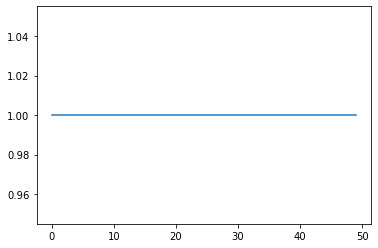

In [59]:
%matplotlib inline
a[0:50] = 1
plt.plot(b,a)
plt.show()

In [60]:
print(a)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


In [28]:
import sympy as spy
from math import exp, atan2
import numpy as np

In [3]:
spy.symbols?

Signature: spy.symbols(names, *, cls=<class 'sympy.core.symbol.Symbol'>, **args)
Docstring:
Transform strings into instances of :class:`Symbol` class.

:func:`symbols` function returns a sequence of symbols with names taken
from ``names`` argument, which can be a comma or whitespace delimited
string, or a sequence of strings::

    >>> from sympy import symbols, Function

    >>> x, y, z = symbols('x,y,z')
    >>> a, b, c = symbols('a b c')

The type of output is dependent on the properties of input arguments::

    >>> symbols('x')
    x
    >>> symbols('x,')
    (x,)
    >>> symbols('x,y')
    (x, y)
    >>> symbols(('a', 'b', 'c'))
    (a, b, c)
    >>> symbols(['a', 'b', 'c'])
    [a, b, c]
    >>> symbols({'a', 'b', 'c'})
    {a, b, c}

If an iterable container is needed for a single symbol, set the ``seq``
argument to ``True`` or terminate the symbol name with a comma::

    >>> symbols('x', seq=True)
    (x,)

To reduce typing, range syntax is supported to create indexed symbols

In [4]:
a = spy.symbols('a', real=True)

In [9]:
b = 0.2

In [19]:
c = b * a * spy.exp(a)

In [26]:
c.subs(a, 0.2)

0.0488561103264068

In [27]:
x, y = spy.symbols('x, y', real=True)


In [31]:
z = atan2(x.subs(x, 2), y.subs(y, 2))

In [32]:
z

0.7853981633974483

In [36]:
z = spy.atan2(x,y)

In [39]:
z.subs?

Signature: z.subs(*args, **kwargs)
Docstring:
Substitutes old for new in an expression after sympifying args.

`args` is either:
  - two arguments, e.g. foo.subs(old, new)
  - one iterable argument, e.g. foo.subs(iterable). The iterable may be
     o an iterable container with (old, new) pairs. In this case the
       replacements are processed in the order given with successive
       patterns possibly affecting replacements already made.
     o a dict or set whose key/value items correspond to old/new pairs.
       In this case the old/new pairs will be sorted by op count and in
       case of a tie, by number of args and the default_sort_key. The
       resulting sorted list is then processed as an iterable container
       (see previous).

If the keyword ``simultaneous`` is True, the subexpressions will not be
evaluated until all the substitutions have been made.

Examples

>>> from sympy import pi, exp, limit, oo
>>> from sympy.abc import x, y
>>> (1 + x*y).subs(x, pi)
pi*y + 1
>>

In [40]:
a

a

In [41]:
x,y

(x, y)

In [42]:
x

x

In [43]:
y

y

In [63]:
z = x ** y

In [55]:
(x**x).diff(x)

x**x*(log(x) + 1)

In [56]:
x = 1

In [57]:
z

atan2(x, y)

In [64]:
z.subs(x,x)

1

In [65]:
z.subs(y,x)

1

In [66]:
z

1

In [67]:
x, y, z = spy.symbols('x, y, z')

In [68]:
z = x + y

In [69]:
z

x + y

In [70]:
z_value = z

In [74]:
val = z_value.subs([x,y],[1,2])

In [84]:
import sympy as spy

In [93]:
value = val.subs({x:1,y:1})

In [95]:
int(value)

2

In [96]:
z

x + y

In [97]:
a = z + z

In [98]:
a

2*x + 2*y

In [99]:
#Pre set coeffs
IN_n_states = [100, 100]
IN_number_of_branches = 2

# Hyper Parameters
sigma = 0.35 # Spiral
warping_coeff = 0.01
decrease_coeff = 0.05 # decrease how Potential decrease when we get further from center
sinus_to_distance_coeff = 0.1

# Instantiation
potential_numeric = np.zeros(IN_n_states)
n_petals = IN_number_of_branches

#--Symbolic Version of the potential--#
# Requires Sympy

# Symbolic variables for symbolic expression of the potential
x_symb, y_symb = spy.symbols('x_symb, y_symb', real=True)

# Transform coordinates from (x, y) to (angle, Distance)
angle_symb = spy.atan2(x_symb, y_symb)
distance_squared_symb = x_symb ** 2 + y_symb ** 2

# Use the chosen shape function
r_symb = (spy.sin((angle_symb + warping_coeff * distance_squared_symb) * n_petals) * sinus_to_distance_coeff * distance_squared_symb + 2)

# Apply the formula
potential_symbolic = -1*spy.exp( -1/2*(1)/(sigma*r_symb)**2)*(1+decrease_coeff*distance_squared_symb)

In [105]:
val.subs?

Signature: val.subs(*args, **kwargs)
Docstring:
Substitutes old for new in an expression after sympifying args.

`args` is either:
  - two arguments, e.g. foo.subs(old, new)
  - one iterable argument, e.g. foo.subs(iterable). The iterable may be
     o an iterable container with (old, new) pairs. In this case the
       replacements are processed in the order given with successive
       patterns possibly affecting replacements already made.
     o a dict or set whose key/value items correspond to old/new pairs.
       In this case the old/new pairs will be sorted by op count and in
       case of a tie, by number of args and the default_sort_key. The
       resulting sorted list is then processed as an iterable container
       (see previous).

If the keyword ``simultaneous`` is True, the subexpressions will not be
evaluated until all the substitutions have been made.

Examples

>>> from sympy import pi, exp, limit, oo
>>> from sympy.abc import x, y
>>> (1 + x*y).subs(x, pi)
pi*y + 1


In [104]:
potential_symbolic.subs({x:1,y:1})

-(0.05*x_symb**2 + 0.05*y_symb**2 + 1)*exp(-1.02040816326531/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**2)

In [108]:
val.evalf(subs={x_symb:2,y_symb:2})

-0.828643795699704

In [107]:
val

-(0.05*x_symb**2 + 0.05*y_symb**2 + 1)*exp(-1.02040816326531/(0.05*(x_symb**2 + y_symb**2)*sin(0.02*x_symb**2 + 0.02*y_symb**2 + 2*atan2(x_symb, y_symb)) + 1)**2)

In [92]:
from time import time
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
import sympy as spy

def generate_potential_2d_spirals_numeric(IN_n_states,IN_number_of_branches,flag_visualize):
    """
    The spiral surface is a modification of the Anormal distribution, which is
    a kind of generalization of the multivariate normal distribution

    INPUT : 
    [IN_n_states] : array with integers giving the number of states is each dimension
    (IN_n_states = [100,50] then x = linspace(x_min,x_max,n_states(1)) and y = linspace(x_min,x_max,n_states(2))
    [IN_n_states] : array with integers giving the number of states is each
    """
    start = time()
    x_min = -20
    x_max = 20
    y_min = -20
    y_max = 20

    x = np.linspace(x_min,x_max,IN_n_states[0])
    y = np.linspace(y_min,y_max,IN_n_states[1])
    end = time()
    print("Time: ", end - start)
    # Hyper Parameters
    start = time()
    sigma = 0.35 # Spiral
    warping_coeff = 0.01
    decrease_coeff = 0.05 # decrease how Potential decrease when we get further from center
    sinus_to_distance_coeff = 0.1
    end = time()
    print("Time: ", end - start)
    # Instantiation
    potential_numeric = np.zeros(IN_n_states)

    # Run
    n_petals = IN_number_of_branches
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):

            # Transform coordinates from (x,y) to (angle,Distance)
            angle = np.arctan2(x[x_id], y[y_id])
            distance_squared = x[x_id]**2 + y[y_id]**2;  # BIG MODIFICATION
            
            # Use the chosen shape function
            r = (np.sin((angle+warping_coeff*distance_squared)*n_petals)*sinus_to_distance_coeff*distance_squared+2)

            # Apply the formula
            potential_numeric[x_id,y_id] = -1*np.exp( -1/2*(1)/(sigma*r)**2)*(1+decrease_coeff*distance_squared)

    potential_numeric = potential_numeric - np.min(potential_numeric[:]) # Shift so that minimum=0
    potential_numeric = potential_numeric/np.sum(potential_numeric[:]) # Normalize at the end because used non-normalized shape function r.

    if flag_visualize:
        x, y = np.meshgrid(x, y)
        z = potential_numeric
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                            linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        fig.colorbar(surf, shrink=0.5, aspect=5)
        
    return x, y, potential_numeric


def generate_potential_2d_spirals_symbolic(IN_n_states,IN_number_of_branches,flag_visualize):
    # Sympy
    start = time()
    x_min = -20
    x_max = 20
    y_min = -20
    y_max = 20

    x = np.linspace(x_min,x_max,IN_n_states[0])
    y = np.linspace(y_min,y_max,IN_n_states[1])

    # Hyper Parameters
    sigma = 0.35 # Spiral
    warping_coeff = 0.01
    decrease_coeff = 0.05 # decrease how Potential decrease when we get further from center
    sinus_to_distance_coeff = 0.1

    # Instantiation
    potential_symbolic_value = np.zeros(IN_n_states)
    n_petals = IN_number_of_branches

    #--Symbolic Version of the potential--#
    # Requires Sympy

    # Symbolic variables for symbolic expression of the potential
    x_symb, y_symb = spy.symbols('x_symb, y_symb', real=True)

    # Transform coordinates from (x, y) to (angle, Distance)
    angle_symb = spy.atan2(x_symb, y_symb)
    distance_squared_symb = x_symb ** 2 + y_symb ** 2

    # Use the chosen shape function
    r_symb = (spy.sin((angle_symb + warping_coeff * distance_squared_symb) * n_petals) * sinus_to_distance_coeff * distance_squared_symb + 2)

    # Apply the formula
    potential_symbolic = -1*spy.exp( -1/2*(1)/(sigma*r_symb)**2)*(1+decrease_coeff*distance_squared_symb)
    end = time()
    print("Time generating the potential: ", end - start)
    # Symbolic derivatives with respect to x and y
    dpotsym_dx = potential_symbolic.diff(x_symb)
    dpotsym_dy = potential_symbolic.diff(y_symb)

    # Compute the expression over our discrete set of bins for checking purposes
    # x = np.linspace(x_min, x_max, IN_n_states[0])
    # y = np.linspace(y_min, y_max, IN_n_states[1])
    start = time()
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):
            start = time()
            potential_symbolic_value[x_id, y_id] = potential_symbolic.evalf(n=10,subs={x_symb:x[x_id], y_symb:y[y_id]})
            #print("Elapsed", time() - start )

    potential_symbolic_value = potential_symbolic_value - np.min(potential_symbolic_value[:]) # Shift so that minimum=0
    potential_symbolic_value = potential_symbolic_value/np.sum(potential_symbolic_value[:]) # Normalize at the end because used non-normalized shape function r.
    end = time()
    print("Time substituting the discrete values: ", end - start)
    if flag_visualize:
        x, y = np.meshgrid(x, y)
        z = potential_symbolic_value
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                            linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        fig.colorbar(surf, shrink=0.5, aspect=5)

    return x, y, potential_symbolic_value, potential_symbolic


In [81]:
%matplotlib qt

In [84]:
x_spy, y_spy, potential_spy, potential_func = generate_potential_2d_spirals_symbolic(IN_n_states=[100,100],IN_number_of_branches=2,flag_visualize=True)

  0%|          | 0/100 [00:00<?, ?it/s]

Time generating the potential:  0.013185977935791016


  3%|▎         | 3/100 [00:08<04:33,  2.82s/it]


KeyboardInterrupt: 

In [29]:
x_num, y_num, potential_num = generate_potential_2d_spirals_numeric(IN_n_states=[100,100],IN_number_of_branches=2,flag_visualize=True)

100%|██████████| 100/100 [00:00<00:00, 1232.89it/s]

Time:  0.00016307830810546875
Time:  0.0


In [20]:
z = spy.symbols('z')

In [55]:
from multiprocessing import Pool
from itertools import combinations
import numba as nb

In [78]:
x_test = np.linspace(0,1,10)
y_test = np.linspace(0,1,10)

def add_func(*inputs):
    x = inputs[0]
    y = inputs[1]
    print("x+y:")
    return x + y

# Serial runtime:


def test_func_serial():
    start = time()
    for x in x_test:
        for y in y_test:
            test_result = add_func(x, y)
    end = time()

    print("Serial Runtime is:", end - start)






In [79]:
# Mock list for parallel
list_xy = []
for x in x_test:
    for y in y_test:
        list_xy.append([x,y])
# Parallelization runtime:
print("I am running")
start = time()
n_threads = 2
print("threads done")
d = Pool(processes=int(n_threads))
print("pool done")
striding = d.map(add_func, list_xy)
print("calculating done")
d.close()
d.join()

end = time()

I am running
threads done
pool done


KeyboardInterrupt: 

In [61]:
test_func_serial()
test_func_parallel()

TypeError: add_func() takes 1 positional argument but 2 were given

In [45]:
a = [1,2,3]
b = [4,5,6]
[t for t in a]
[k for k in ]
[[t, k] for t, k in combinations(a,b)]

TypeError: 'list' object cannot be interpreted as an integer

In [46]:
combinations?

Init signature: combinations(iterable, r)
Docstring:     
Return successive r-length combinations of elements in the iterable.

combinations(range(4), 3) --> (0,1,2), (0,1,3), (0,2,3), (1,2,3)
Type:           type
Subclasses:     


In [47]:
import itertools
list1=['a','b','c']
list2=[1,2]

[list(zip(x,list2)) for x in itertools.permutations(list1,len(list2))]

[[('a', 1), ('b', 2)],
 [('a', 1), ('c', 2)],
 [('b', 1), ('a', 2)],
 [('b', 1), ('c', 2)],
 [('c', 1), ('a', 2)],
 [('c', 1), ('b', 2)]]

In [48]:
c = np.meshgrid(a,b)

array([1, 2, 3])

In [65]:
np.arange(0,100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [72]:
np_vec_add_func = np.vectorize(add_func)

In [74]:
outputs = np_vec_add_func(1,2)

x+y:
x+y:


In [91]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
import sympy as spy
#----Utils----#


def generate_potential_2d_Zshape_numeric(IN_n_states,flag_visualize):
    """
    The Zshape surface is a weighted sum of 2d Normal distributions and
    exponential functions
    
    INPUT : 
    [IN_n_states] : array with integers giving the number of states is each dimension
    (IN_n_states = [100,50] then x = linspace(x_min,x_max,n_states(1)) and y = linspace(x_min,x_max,n_states(2))
    [IN_n_states] : array with integers giving the number of states is each
    """
    x_min = -2
    x_max = 2
    y_min = -1
    y_max = 3

    x = np.linspace(x_min,x_max,IN_n_states[0]);
    y = np.linspace(y_min,y_max,IN_n_states[1]);

    #---Hyper-parameters---#
    border_coeff = 1; # Coefficient of borders 
    well_coeff = 10; # Coefficient of wells (larger value makes wells deeper and barrier between them bigger)


    #---PARAMETERS OF NORMAL DISTRIBUTIONS---#
    # Section "Bivariate case" in [https://en.wikipedia.org/wiki/Multivariate_normal_distribution]
    mu_1 = [-1.5,-0.5]
    mu_2 = [1.5,2.5]
    sigm_center_well = 0.4 # Sigma of some of the wells, sigm for sigma
    covar_mat_well = np.diag(np.dot(np.ones((len(IN_n_states))),sigm_center_well))
    ###Debugging
    print(covar_mat_well)

    mu_3 = [-0.5, 0]
    sig = [0.7, 0.28] # Origion: [1, 0.4] * 0.7 = result, flat one
    ro = 0.7
    colvar_mat_3 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    mu_4 = [0, 1]
    sig = [0.7, 0.7] # Origion: [1, 1] * 0.7, Diagonal one
    ro = -0.8
    colvar_mat_4 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    mu_5 = [0.5, 2]
    sig = [0.7, 0.28] # Origion: [1, 0.4] * 0.7 = result, flat one
    ro = 0.7
    colvar_mat_5 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    #---INSTANTIATION---#
    potential_numeric = np.zeros(IN_n_states)

    #---Run---#
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):

            #--Borders (Potential increase to infinity outside of [x_min,x_max] and [y_min,y_max])--#
            border_1 = np.exp(x_min - x[x_id])
            border_2 = np.exp(x[x_id] - x_max)
            border_3 = np.exp(y_min - y[y_id])
            border_4 = np.exp(y[y_id] - y_max)

            #--WELLS--# # This requires multivariate normal distribution generating function
            well_1 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_1, cov=covar_mat_well)
            well_2 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_2, cov=covar_mat_well)
            well_3 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_3, cov=colvar_mat_3) # Numeric expression
            well_4 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_4, cov=colvar_mat_4)
            well_5 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_5, cov=colvar_mat_5)  

            border_contribution = (border_1 + border_2 + border_3 + border_4) * border_coeff
            well_contribution = (well_1 + well_2+ well_3+ well_4 + well_5) * well_coeff

            potential_numeric[x_id,y_id] = border_contribution - well_contribution

    return potential_numeric, x, y

    # Sympy
    # TODO

In [86]:
%matplotlib qt

In [87]:
generate_potential_2d_Zshape_numeric(IN_n_states=[100,100],flag_visualize=True)

  5%|▌         | 5/100 [00:00<00:05, 18.55it/s]

[[0.4 0. ]
 [0.  0.4]]


100%|██████████| 100/100 [00:05<00:00, 19.24it/s]


(array([[-0.1101567 , -0.26772809, -0.42714546, ...,  1.89208342,
          1.9344483 ,  1.97856913],
        [-0.25402998, -0.41662915, -0.58099171, ...,  1.84590352,
          1.88933438,  1.9344483 ],
        [-0.39192816, -0.55925888, -0.72821921, ...,  1.80130958,
          1.84590352,  1.89208342],
        ...,
        [ 1.89208342,  1.84590352,  1.80130958, ..., -0.72821921,
         -0.55925888, -0.39192816],
        [ 1.9344483 ,  1.88933438,  1.84590352, ..., -0.58099171,
         -0.41662915, -0.25402998],
        [ 1.97856913,  1.9344483 ,  1.89208342, ..., -0.42714546,
         -0.26772809, -0.1101567 ]]),
 array([-2.        , -1.95959596, -1.91919192, -1.87878788, -1.83838384,
        -1.7979798 , -1.75757576, -1.71717172, -1.67676768, -1.63636364,
        -1.5959596 , -1.55555556, -1.51515152, -1.47474747, -1.43434343,
        -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
        -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
        

In [102]:
n_points = [10, 20, 30, 50, 100]
n_times = []
for i in n_points:
    start = time()
    x_spy, y_spy, potential_spy, potential_func = generate_potential_2d_spirals_symbolic(IN_n_states=[i,i],IN_number_of_branches=2,flag_visualize=False)
    end = time()
    n_times.append(end - start)

plt.xlabel('Number of IN_n_states')
plt.ylabel('Time consumption (s)')
plt.plot(n_points, n_times)
plt.show()


  0%|          | 0/10 [00:00<?, ?it/s]

Time generating the potential:  0.010363340377807617


  0%|          | 0/20 [00:00<?, ?it/s]

Time substituting the discrete values:  0.008440017700195312
Time generating the potential:  0.007610797882080078


  0%|          | 0/30 [00:00<?, ?it/s]

Time substituting the discrete values:  0.007257699966430664
Time generating the potential:  0.007161855697631836


  0%|          | 0/50 [00:00<?, ?it/s]

Time substituting the discrete values:  0.01270914077758789
Time generating the potential:  0.007516145706176758


  0%|          | 0/100 [00:00<?, ?it/s]

Time substituting the discrete values:  0.013251304626464844
Time generating the potential:  0.007468223571777344


100%|██████████| 100/100 [03:07<00:00,  1.88s/it]

Time substituting the discrete values:  0.017148971557617188


In [104]:
plt.xlabel('Number of IN_n_states')
plt.ylabel('Time consumption (s)')
plt.plot(n_points, n_times)
plt.title('Time Consumption for n_petals = 2')
plt.show()

# Importing files

In [1]:
from generate_potential_2d_spiral import *
from generate_potential_2d_Zshape import *


## - numeric plots

In [2]:
%matplotlib qt
generate_potential_2d_spirals_numeric(IN_n_states=[100,100],IN_number_of_branches=2,flag_visualize=True)

100%|██████████| 100/100 [00:00<00:00, 1293.26it/s]


(array([[-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
          19.5959596 ,  20.        ],
        [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
          19.5959596 ,  20.        ],
        [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
          19.5959596 ,  20.        ],
        ...,
        [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
          19.5959596 ,  20.        ],
        [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
          19.5959596 ,  20.        ],
        [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
          19.5959596 ,  20.        ]]),
 array([[-20.        , -20.        , -20.        , ..., -20.        ,
         -20.        , -20.        ],
        [-19.5959596 , -19.5959596 , -19.5959596 , ..., -19.5959596 ,
         -19.5959596 , -19.5959596 ],
        [-19.19191919, -19.19191919, -19.19191919, ..., -19.19191919,
         -19.19191919, -19.19191919],
        ...,
